In [1]:
import lvmnebular
import numpy as np

In [2]:
u=lvmnebular.simulation()
u.loadsim('Bubble_v2_1e-11',900)

Loading simulation: /home/amrita/LVM/lvmnebular/Bubble_v2_1e-11



In [3]:
u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), loadfile=True, plot=False)


Fitting Emmission Lines: ['9069' '7319' '7320' '7330' '6731' '6717' '6584' '6563' '6548' '6312'
 '5755' '5007' '4959' '4861' '4363' '4069' '4076' '3970' '3729' '3726']


(169,)
(169,)
[ 46  59  53  55  42  44  34  73  68  64  70  49  65  38  52  28  43   0
   5  90  83  77  75  85  63  81  48  82  40  66  32  56  17  47   1   2
   6 109 101  95  92  94 103  78  97  67  93  58  99  45  86  36  74  25
  60  15  54  11   3   4   8 128 120 114 110 112 117 121 100 115  88 111
  72 113  69 119  62 106  39  89  33  84  23  79  18  76  50  10   7   9
  14 150 140 133 129 127 131 139 142 124 136 116 134 102 135  96 138  91
 146  98 137  61 118  37 108  31 105  26 104  22 107  80  51  13  12  16
  21 150 140 156 152 149 154 158 139 142 157 136 141 153 130 151 126 155
 125 138 132 146 159 137 122 148  71 145  41 143  35 144  29 147  27 107
 123  87  57  20  19  24  30] [ 0.00000000e+00  1.85000000e+01 -1.85000000e+01  0.00000000e+00
 -3.69999996e+01 -3.69999996e+01 -5.54999987e+01 -1.85000000e+01
 -7.39999968e+01 -5.54999987e+01  1.85000000e+01  3.69999996e+01
 -3.69999996e+01  0.00000000e+00 -9.24999938e+01 -9.24999938e+01
 -7.39999968e+01 -7.39999968e+01 -1.109

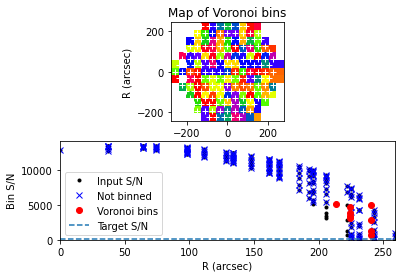

In [10]:
u.voronoibin(target_sn=100, lineid='6563', plot=True)

In [5]:
u.runpyneb(niter=4, bin=False, pertsim=False)

warng _ManageAtomicData: rec data not available for Al2
warng _ManageAtomicData: rec data not available for Ar2
warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: rec data not available for Ar4
warng _ManageAtomicData: rec data not available for Ar5
warng _ManageAtomicData: rec data not available for Ba2
warng _ManageAtomicData: rec data not available for Ba4
ERROR None: No data for this case B
ERROR None: No data for this case B
warng _ManageAtomicData: rec data not available for Ca5
warng _ManageAtomicData: rec data not available for Cl2
warng _ManageAtomicData: rec data not available for Cl3
warng _ManageAtomicData: rec data not available for Cl4
warng _ManageAtomicData: rec data not available for Fe3
warng _ManageAtomicData: rec data not available for K4
warng _ManageAtomicData: rec data not available for K5
warng _ManageAtomicData: rec data not available for Mg5
warng _ManageAtomicData: rec data not available for Mg7
ERROR None: No data for this case 

/home/amrita/LVM/lvmnebular/lvmnebular.py:282: RuntimeWarning: Mean of empty slice
  self.TeO2 = np.nanmean(TO2, axis=1)
/home/amrita/miniconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/amrita/LVM/lvmnebular/lvmnebular.py:301: RuntimeWarning: Mean of empty slice
  self.TeO3 = np.nanmean(TO3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:318: RuntimeWarning: Mean of empty slice
  self.TeN2 = np.nanmean(TN2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:337: RuntimeWarning: Mean of empty slice
  self.TeS2 = np.nanmean(TS2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:354: RuntimeWarning: Mean of empty slice
  self.TeS3 = np.nanmean(TS3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:372: RuntimeWarning: Mean of empty slice
  self.neO2 = np.nanmean(NO2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:386: RuntimeWarning: Mean of empty 

(157,)
(157, 1)
(157, 1)


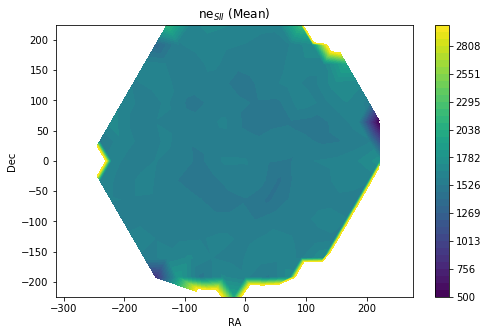

In [122]:
u.plotmap(u.linefitdict['neS2'], 500 , 3000, title=r'ne$_{SII}$ (Mean)', output='neS2')


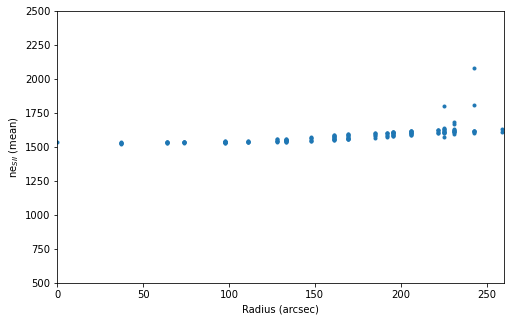

In [6]:
u.plotprofile(u.linefitdict['neS2'], 500, 2500, title=r'ne$_{SII}$ (mean)', output='neS2')

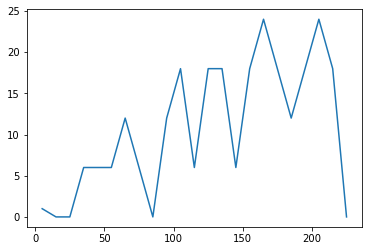

In [8]:
u.radialbin(rbinmax=240, drbin=10)

In [143]:
print(np.column_stack([u.linefitdict['neS2'], u.linefitdict['neO2']]))

[[ 1593.9096374     87.85174807]
 [ 1571.33971524   106.11942225]
 [ 1563.11787425    83.59809758]
 [ 1530.79744519   107.47325151]
 [ 1596.83797263   109.32975863]
 [ 1535.32994585    92.51674029]
 [ 1561.3637371    109.15391909]
 [ 1446.47065467   103.21181098]
 [ 1520.54449844   106.6330354 ]
 [ 1490.16367509    96.04392231]
 [ 1448.67552986    98.87472055]
 [ 1503.00103355    97.29892475]
 [ 1519.20219566    72.16926067]
 [ 1510.05965343   112.29582722]
 [ 1573.51169896   106.93852977]
 [ 1552.02196744    94.75396634]
 [ 1497.81150179    98.1875278 ]
 [ 1509.61833161   106.34022079]
 [ 1604.2715515     96.02985588]
 [ 1572.66347812    95.52690185]
 [ 1522.94195012    94.46535004]
 [ 1545.25448977   103.30187294]
 [ 1544.23513876    97.30121001]
 [ 1533.45192864    89.45180116]
 [ 1526.64570459    88.63592731]
 [ 1580.31868879    83.85519675]
 [ 1501.14372603    85.71079424]
 [ 1588.49320242    80.31583269]
 [ 1554.62828736    94.11484124]
 [ 1541.3569732     90.03840447]
 [ 1529.29